In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [33]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

In [34]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [36]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


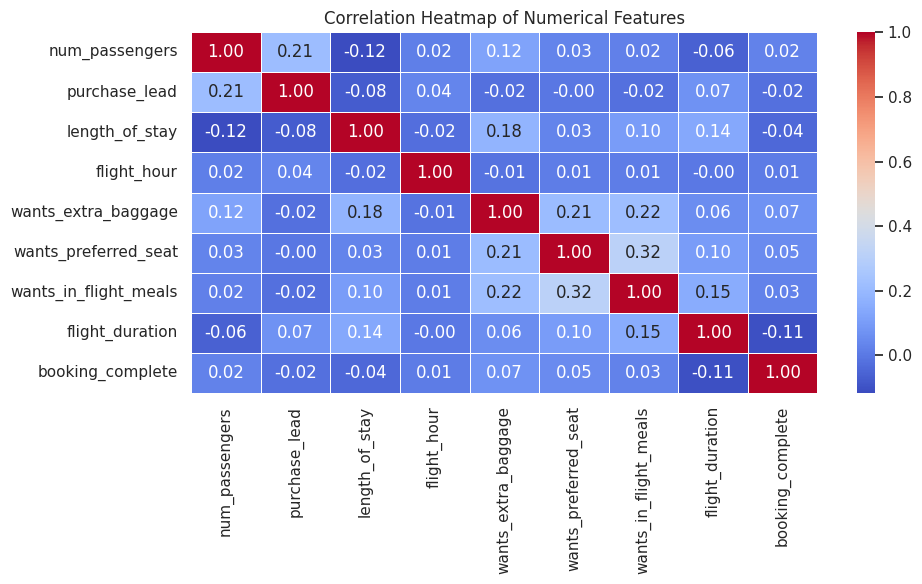

In [53]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

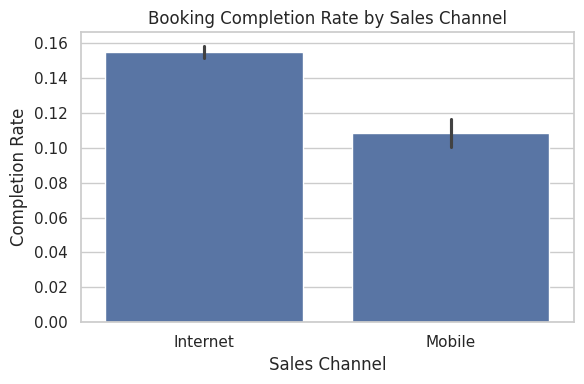

In [54]:
# Booking Completion by Sales Channel
plt.figure(figsize=(6, 4))
sns.barplot(x='sales_channel', y='booking_complete', data=df)
plt.title("Booking Completion Rate by Sales Channel")
plt.ylabel("Completion Rate")
plt.xlabel("Sales Channel")
plt.tight_layout()
plt.show()

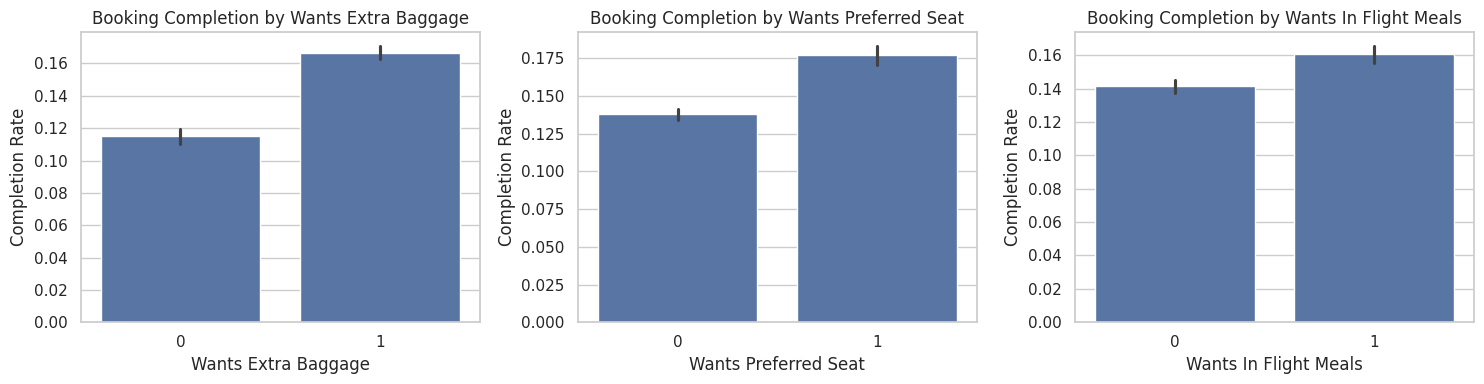

In [55]:
# Booking Completion by Extra Services
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, service in enumerate(services):
    sns.barplot(x=service, y='booking_complete', data=df, ax=axes[i])
    axes[i].set_title(f'Booking Completion by {service.replace("_", " ").title()}')
    axes[i].set_ylabel("Completion Rate")
    axes[i].set_xlabel(service.replace("_", " ").title())
plt.tight_layout()
plt.show()

<ipython-input-56-567634df41d8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='flight_hour', y='booking_complete', data=df, ci=None)


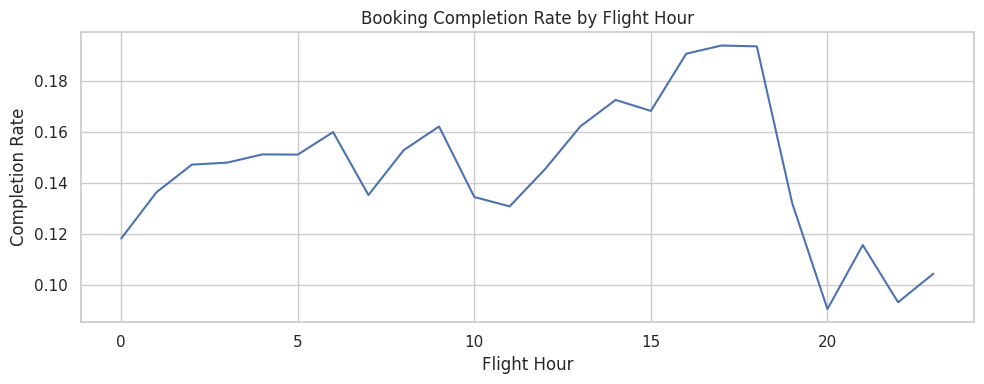

In [56]:
# Booking Completion by Flight Hour
plt.figure(figsize=(10, 4))
sns.lineplot(x='flight_hour', y='booking_complete', data=df, ci=None)
plt.title("Booking Completion Rate by Flight Hour")
plt.ylabel("Completion Rate")
plt.xlabel("Flight Hour")
plt.tight_layout()
plt.show()

In [37]:
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
label_encoders = {}

In [38]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [39]:
X = df.drop(columns='booking_complete')
y = df['booking_complete']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [42]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=42)

In [43]:
y_pred = rf_model.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8520
           1       0.48      0.23      0.31      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.59      0.61     10000
weighted avg       0.82      0.85      0.83     10000



In [45]:
print(y.value_counts(normalize=True))

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

<ipython-input-48-af061801e8ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


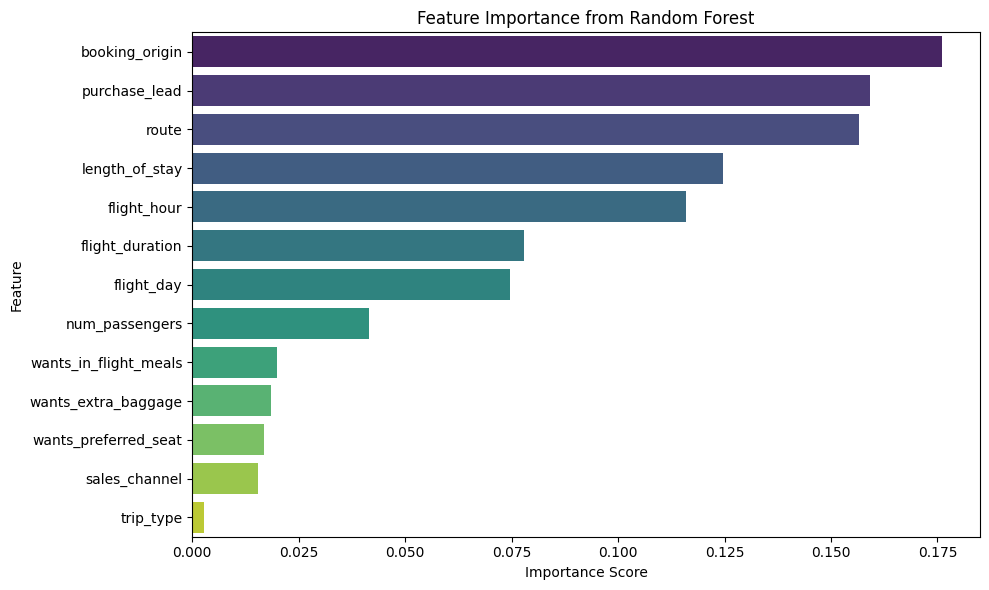

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [49]:
import shap

In [50]:
# Using smaller subset for SHAP
X_sample = X_train.sample(n=1000, random_state=42)

explainer = shap.Explainer(rf_model, X_sample)
shap_values = explainer(X_sample)

100%|===================| 1999/2000 [06:13<00:00]       

SHAP Bar Plot - Overall Impact


<Figure size 640x480 with 0 Axes>

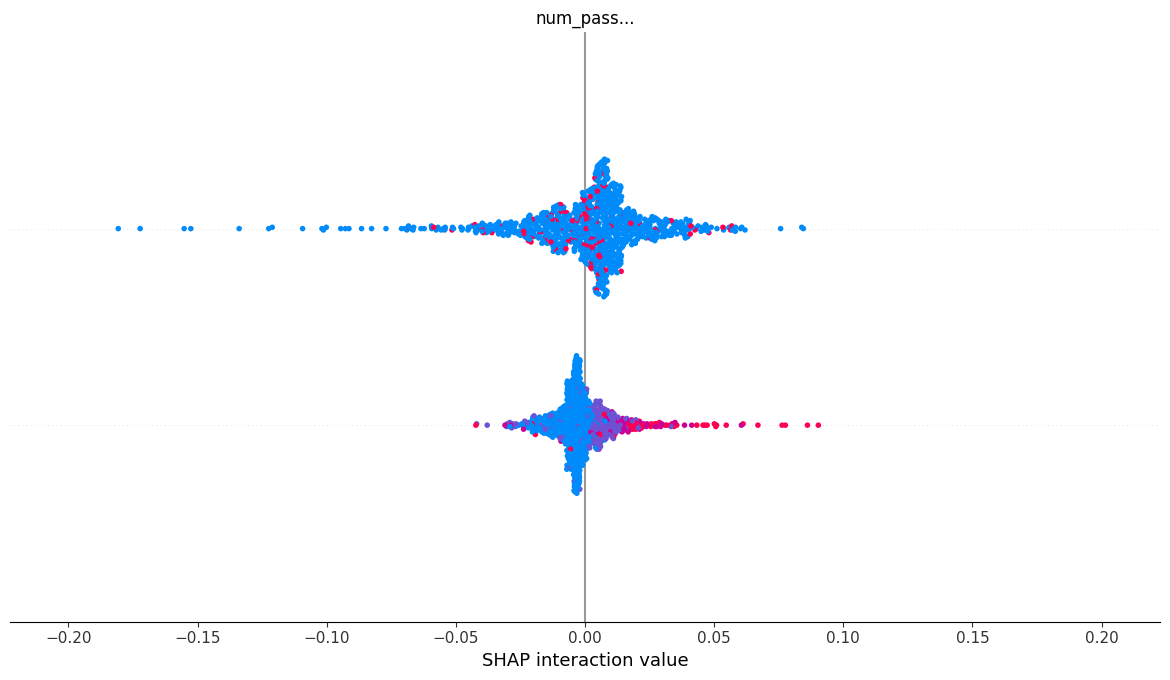

In [51]:
print("SHAP Bar Plot - Overall Impact")
shap.summary_plot(shap_values, X_sample, plot_type="bar")